In [1]:
import tensorflow as tf

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2022-12-04 15:34:32--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2022-12-04 15:34:32 (32.1 MB/s) - ‘moore.csv’ saved [2302/2302]



In [4]:
data=pd.read_csv("moore.csv",header=None,names=["Year","Qt"])

In [5]:
data.head()

,Year,Qt
0,1971,2300
1,1972,3500
2,1973,2500
3,1973,2500
4,1974,4100


In [6]:
X=data['Year']
X.shape
X=np.array(X).reshape(-1,1) #make it 2D array of size N*D where D=1
Y=np.array(data['Qt'])

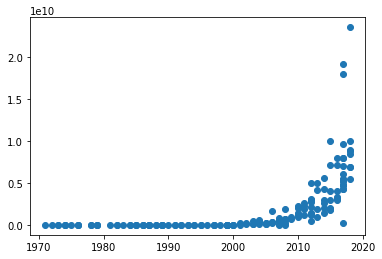

In [7]:
plt.scatter(X,Y)
#data is exponential

In [8]:
#make the data linear by using log
Y=np.log(Y)

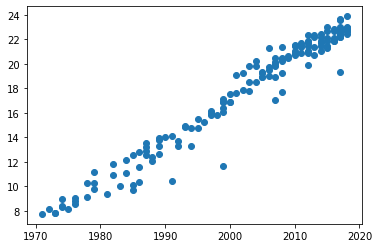

In [9]:
plt.scatter(X,Y)

In [10]:
#center the X data
X=X-np.mean(X)

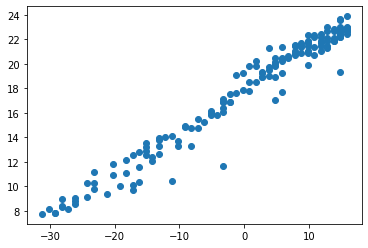

In [11]:
plt.scatter(X,Y)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model=Sequential()
model.add(Dense(1,input_shape=(1,)))
model.compile(optimizer=tf.keras.optimizers.SGD(0.001,0.9),loss="mse")

In [15]:
#learning rate schedular
def schedule(epoch,lr):
    if epoch>=50:
        return 0.0001
    return 0.001

scheduler =tf.keras.callbacks.LearningRateScheduler(schedule)

In [ ]:
#train the model
f=model.fit(X,Y,epochs=200,callbacks=[scheduler])

In [26]:
pred=model.predict(X).flatten()

6/6 [==============================] - 0s 2ms/step


In [27]:
np.allclose(pred,Y)

False

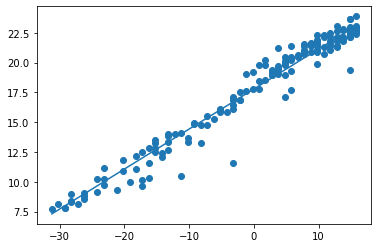

In [28]:
plt.scatter(X,Y)
plt.plot(X,pred)

In [31]:
#manual calculation
#gets the weight
w,b = model.layers[0].get_weights()
pred2=(X.dot(w)+b).flatten()

In [32]:
np.allclose(pred,pred2)

True